<a href="https://colab.research.google.com/github/almachn/dicoding-bycicle-analisist/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alma Choerunisa
- **Email:** mc367d5x0927@student.devacademy.id
- **ID Dicoding:** MC367D5X0927

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim atau cuaca?
- Apakah ada pola tertentu dalam penggunaan sepeda di berbagai hari kerja dan akhir pekan?
- Bagaimana pola penggunaan sepeda berdasarkan workingday/weekday dan holiday?

## Import Semua Packages/Library yang Digunakan

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
day_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Dataset ini merupakan data penyewaan sepeda dalam skala harian. Total ada 17 kolom di setiap baris data, yang masing-masing memberi info tentang kondisi hari tersebut dan jumlah peminjaman sepeda.

- instant: Nomor urut data.
- dteday: Tanggal.
- season: Musim saat data dicatat (1 = semi, 2 = panas, 3 = gugur, 4 = dingin).
- yr: Tahun (0 = 2011, 1 = 2012).
- mnth: Bulan (1 sampai 12).
- holiday: Apakah hari libur nasional? (1 = ya, 0 = tidak).
- weekday: Hari dalam seminggu (0 = Minggu, 6 = Sabtu).
- workingday: Apakah hari kerja (bukan weekend atau libur)? (1 = ya, 0 = tidak).
- weathersit: Kondisi cuaca (semakin besar angkanya, semakin buruk cuacanya).
- temp: Suhu normalisasi (antara 0 dan 1).
- atemp: Suhu yang dirasakan.
- hum: Kelembapan.
- windspeed: Kecepatan angin.
- casual: Jumlah peminjam casual (pengguna tidak terdaftar).
- registered: Jumlah peminjam registered (pengguna terdaftar).
- cnt: Total peminjaman sepeda (casual + registered).


In [51]:
hour_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dataset kedua merupakan versi yang lebih rinci, karena mencatat peminjaman per jam. Total ada 18 kolom di sini—semua kolom dari dataset harian tadi, ditambah satu tambahan penting, yaitu hr.
- hr: Jam (0 sampai 23).

### Assessing Data

In [52]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

Dataset terdiri dari 731 entri dan 16 kolom, mencakup data harian yang berhubungan dengan penggunaan sepeda, kondisi cuaca, dan faktor kalender.
- Jumlah total data: 731 baris
- Jumlah kolom: 16 kolom
- Tidak ditemukan nilai yang kosong atau hilang pada semua kolom.
- Data mencakup dua tahun (2011–2012)
- Ukuran memori: ~91.5 KB

Tipe Data
- Numerik Integer (int64): 11 kolom
- Numerik Desimal (float64): 4 kolom
- Objek (Tanggal) (object): 1 kolom (dteday)
---
**Kesalahan:**
1. Dataset lengkap tanpa missing value, sehingga tidak memerlukan imputasi awal.
2. Kolom dteday perlu dikonversi ke format datetime untuk mempermudah analisis berbasis waktu.
3. Variabel target yang biasa digunakan untuk analisis prediktif adalah kolom cnt.


In [53]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

Dataset mencakup 731 entri.

- **Waktu dan Identitas**  
  Kolom instant menunjukkan urutan data dari 1 hingga 731, dengan rata-rata berada di tengah yaitu 366.

- **Musim dan Waktu Kalender**  
  Nilai season berkisar dari 1 (spring) hingga 4 (winter), dengan nilai rata-rata sekitar 2.5. Kolom yr memiliki nilai 0 dan 1 yang merepresentasikan tahun 2011 dan 2012 secara berurutan. Kolom mnth (bulan) bervariasi dari 1 hingga 12, dengan rata-rata sekitar bulan ke-6 (Juni).

- **Hari Libur dan Hari Kerja**  
  Kolom holiday sebagian besar bernilai 0 (bukan hari libur), karena rata-rata hanya 0.0287. Artinya, hanya sekitar 2.87% dari data yang merupakan hari libur. Sedangkan workingday menunjukkan bahwa sekitar 68.4% hari dalam dataset adalah hari kerja.

- **Hari dalam Minggu dan Kondisi Cuaca**  
  Rata-rata nilai weekday 2.99, mendekati hari Rabu (nilai 3), dengan rentang dari 0 (Minggu) hingga 6 (Sabtu). Pada kondisi cuaca (weathersit), nilai rata-ratanya 1.39 yang mendekati kondisi cuaca paling cerah (kategori 1), dengan maksimum pada kategori 3 (kondisi cuaca terburuk dalam dataset).

- **Kondisi Lingkungan**  
  Suhu (temp) berkisar antara 0.059 hingga 0.861 dengan rata-rata 0.495. Suhu yang dirasakan (atemp) sedikit lebih rendah dengan rata-rata 0.474. Kelembapan (hum) cukup tinggi, rata-rata di angka 0.628. Kecepatan angin (windspeed) rata-rata berada di 0.19.

- **Jumlah Pengguna Sepeda**  
  Jumlah pengguna kasual (casual) memiliki rata-rata sekitar 848. Pengguna terdaftar (registered), rata-ratanya jauh lebih tinggi yaitu 3.656. Secara keseluruhan, total jumlah pengguna (cnt) berkisar dari 22 hingga 8.714 per hari, dengan rata-rata sekitar 4.504 pengguna sepeda per hari.

---

**Kesalahan atau Potensi Anomali**

**1. Kolom Hum**
- **Minimum = 0.000**
- **Maksimum = 0.9725**

Dalam kondisi cuaca normal, kelembapan relatif hampir tidak pernah sampai pada angka nol.

**2. Kolom Casual dan Registered**
- **Minimum casual = 2**, **registered = 20**, tapi **total cnt minimum = 22**

Total minimum pengguna sepeda harian sangat rendah, hanya 22. Hal ini mungkin tidak salah, bisa jadi hari tersebut memiliki kondisi cuaca ekstrem atau merupakan hari libur besar. Sebaiknya ditelusuri lebih lanjut dengan melihat weathersit, holiday, atau dteday.

 **3. Kolom windspeed**
- **Minimum = 0.022**, **Maksimum = 0.507**

Walaupun tidak terlihat anomali besar di sini, dan nilai-nilai rendah mendekati nol bisa jadi mencerminkan cuaca yang sangat tenang, hal ini seharusnya tetap ditelusuri lebih lanjut.




In [54]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**

Tidak *missing value* pada data ini.

In [55]:
day_df.duplicated().sum()

np.int64(0)

**Insight:**

Tidak ada duplikat pada data ini.

In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Dataset ini terdiri dari 17.379 baris dan 17 kolom. Data lengkap, tidak nilai yang hilang.

- Total entri: 17.379 baris
- Jumlah fitur (kolom): 17 kolom
- Penggunaan memori: Sekitar 2.3 MB

**Tipe data:**
- Integer (int64): 12 kolom
- Float (float64): 4 kolom
- Object (object): 1 kolom (dteday, yang berisi tanggal)

---
**Kesalahan:**

Kolom dteday perlu dikonversi ke format waktu untuk analisis berbasis tanggal dan waktu.

In [57]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Dataset terdiri dari 17.379 entri

**Nilai Rata-rata (Mean):**
- Jam (hr): 11.55  
- Suhu (temp): 0.497  
- Suhu yang dirasakan (atemp): 0.476  
- Kelembapan (hum): 0.627  
- Kecepatan angin (windspeed): 0.190  
- Jumlah peminjam kasual (casual): 35.68  
- Jumlah peminjam terdaftar (registered): 153.79  
- Jumlah total peminjam (cnt): 189.46  


**Nilai Minimum dan Maksimum:**
- Temp: dari 0.020 hingga 1.000  
- Atemp: dari 0.000 hingga 1.000  
- Hum: dari 0.000 hingga 1.000  
- Windspeed: dari 0.000 hingga 0.851  
- Casual: dari 0 hingga 367  
- Registered: dari 0 hingga 886  
- Jumlah total peminjam: dari 1 hingga 977  

**Potensi Anomali:**
- **Kelembapan (hum)** dan **kecepatan angin (windspeed)** memiliki nilai minimum **0**, yang secara fisik mungkin tidak realistis, dan merupakan tanda pencatatan yang hilang atau salah.
- **Jumlah peminjam kasual dan terdaftar** memiliki nilai minimum 0, menandakan pada beberapa jam tidak ada peminjaman sama sekali. Bisa jadi valid, tetapi perlu divalidasi lebih lanjut.
- **Jumlah total peminjam (cnt)** memiliki nilai minimum 1, yang bisa menjadi anomali kecil karena seharusnya bisa saja ada waktu tanpa peminjaman sama sekali.

In [58]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
Tidak ada *missing value* pada data ini.

In [59]:
hour_df.duplicated().sum()

np.int64(0)

**Insight:**

Tidak ada duplikat pada data ini.

### Cleaning Data

In [60]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit": "weather",
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [61]:
day_df['date'] = pd.to_datetime(day_df['date'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [62]:
print(day_df['year'].unique())
print(day_df['season'].unique())
print(day_df['month'].unique())
print(day_df['weather'].unique())
print(day_df['holiday'].unique())
print(day_df['weekday'].unique())
print(day_df['workingday'].unique())


[0 1]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2 1 3]
[0 1]
[6 0 1 2 3 4 5]
[0 1]


In [63]:
# Mapping untuk year
year_mapping = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_mapping)

# Mapping untuk season
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_df['season'] = day_df['season'].map(season_mapping)

# Mapping untuk month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].map(month_mapping)

# Mapping untuk weather (hanya 1, 2, 3 yang ada)
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain'
}
day_df['weather'] = day_df['weather'].map(weather_mapping)

# Mapping untuk holiday
holiday_mapping = {0: 'No', 1: 'Yes'}
day_df['holiday'] = day_df['holiday'].map(holiday_mapping)

# Mapping untuk weekday (0 = Sunday, 6 = Saturday, atau sebaliknya tergantung dataset)
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

# Mapping untuk workingday
workingday_mapping = {0: 'Holiday', 1: 'Working Day'}
day_df['workingday'] = day_df['workingday'].map(workingday_mapping)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,Holiday,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sunday,Holiday,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Monday,Working Day,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tuesday,Working Day,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wednesday,Working Day,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
kategori_cols = ['year', 'season', 'month', 'weather', 'holiday', 'weekday', 'workingday']
day_df[kategori_cols] = day_df[kategori_cols].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

###Cleaning Data Hour

In [65]:
hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit": "weather",
}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [66]:
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [67]:
# Mapping untuk year
year_mapping = {0: 2011, 1: 2012}
hour_df['year'] = hour_df['year'].map(year_mapping)

# Mapping untuk season
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
hour_df['season'] = hour_df['season'].map(season_mapping)

# Mapping untuk month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}
hour_df['month'] = hour_df['month'].map(month_mapping)

# Mapping untuk weather
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain'
}
hour_df['weather'] = hour_df['weather'].map(weather_mapping)

# Mapping untuk holiday
holiday_mapping = {0: 'No', 1: 'Yes'}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)

# Mapping untuk weekday
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

# Mapping untuk workingday
workingday_mapping = {0: 'Holiday', 1: 'Working Day'}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,No,Saturday,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Saturday,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Saturday,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Saturday,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Saturday,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [68]:
kategori_cols = ['year', 'season', 'month', 'weather', 'holiday', 'weekday', 'workingday']
hour_df[kategori_cols] = hour_df[kategori_cols].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17376 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- Perubahan nama dilakukan pada beberapa kolom menggunakan fungsi '.rename' untuk mempermudah pembacaan data tersebut.
- Kolom date diubah ke tipe datetime agar Python dapat mengenalinya sebagai data waktu. Hal ini penting untuk mempermudah proses analisis berbasis tanggal.
- Beberapa kolom pada dataset memiliki nilai numerik yang merepresentasikan kategori, seperti season, year, month, weather, dan lainnya. Untuk meningkatkan kemudahan dalam membaca dan melakukan analisis, nilai-nilai tersebut di-mapping ke dalam label teks yang lebih bermakna.
- Kolom-kolom seperti year, season, month, dan sejenisnya berisi data yang bersifat kategorikal, bukan numerik kontinu. Oleh karena itu, kolom-kolom ini dikonversi ke tipe data category agar penggunaan memori lebih efisien dan proses analisis menjadi lebih tepat.

## Exploratory Data Analysis (EDA)

In [69]:
# Statistik deskriptif berdasarkan musim
season_stats = day_df.groupby('season').agg({
    'cnt': ['mean', 'min', 'max'],
    'casual': ['mean', 'min', 'max'],
    'registered': ['mean', 'min', 'max'],
    'temp': ['mean', 'min', 'max'],
    'atemp': ['mean', 'min', 'max'],
    'hum': ['mean', 'min', 'max'],
    'windspeed': ['mean', 'min', 'max']
}).round(2)

season_stats

<ipython-input-69-7dbbecae8166>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = day_df.groupby('season').agg({


cnt               casual            registered             temp  \
           mean   min   max     mean  min   max       mean  min   max  mean   
season                                                                        
Fall    5644.30  1115  8714  1202.61  118  3160    4441.69  889  6917  0.71   
Spring  2604.13   431  7836   334.93    9  3155    2269.20  416  5315  0.30   
Summer  4992.33   795  8362  1106.10  120  3410    3886.23  674  6456  0.54   
Winter  4728.16    22  8555   729.11    2  3031    3999.05   20  6946  0.42   

        ...       atemp               hum             windspeed              
        ...   max  mean   min   max  mean   min   max      mean   min   max  
season  ...                                                                  
Fall    ...  0.86  0.66  0.24  0.84  0.63  0.36  0.94      0.17  0.06  0.38  
Spring  ...  0.57  0.30  0.08  0.55  0.58  0.00  0.95      0.21  0.05  0.51  
Summer  ...  0.81  0.52  0.25  0.76  0.63  0.25  0.92      0.20  0.07  0.39  
Winter  ...  0.66  0.42  0.23  0.61  0.67  0.33  0.97      0.17  0.02  0.42  

[4 rows x 21 columns]

**Analisis Statistik Berdasarkan Musim**

**Musim Gugur (Fall)**

Rata-rata total penyewa per hari: 5.644
- Casual: 1.203
- Registered: 4.442

Suhu:
- Temp mean: 0.71
- Atemp: 0.66
- Hum mean: 0.63
- Windspeed mean: 0.17

Jumlah minimum penyewa: 1.115, maksimum: 8.714

---
**Musim Semi (Spring)**

Rata-rata total penyewa per hari: 2.604
- Casual: 335
- Registered: 2.269

Suhu:

- Temp rata-rata: 0.30
- Atemp terasa: 0.30
- Hum mean: 0.58
- Windspeed mean: 0.21

Jumlah minimum penyewa: 431, maksimum: 7.836

---
**Musim Panas (Summer)**

Rata-rata total penyewa per hari: 4.992
- Casual: 1.106
- Registered: 3.886

Suhu:
- Temp rata-rata: 0.54
- Atemp: 0.52
- Hum mean: 0.63
- Windspeed mean: 0.20

Jumlah minimum penyewa: 795, maksimum: 8.362

---
**Musim Dingin (Winter)**

Rata-rata total penyewa per hari: 4.728
- Casual: 729
- Registered: 3.999

Suhu:
- Temp rata-rata: 0.42
- Atemp: 0.42
- Hum mean: 0.67
- Windspeed mean: 0.17

Jumlah minimum penyewa: 22, maksimum: 8.555

In [70]:
total_per_season = day_df.groupby('season')[['cnt', 'casual', 'registered']].sum().sort_values(by='cnt', ascending=False)

print(total_per_season)

            cnt  casual  registered
season                             
Fall    1061129  226091      835038
Summer   918589  203522      715067
Winter   841613  129782      711831
Spring   471348   60622      410726


<ipython-input-70-d615e029ade9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_season = day_df.groupby('season')[['cnt', 'casual', 'registered']].sum().sort_values(by='cnt', ascending=False)


In [71]:
season_stats = day_df.groupby('season').agg({
    'cnt': ['sum', 'mean', 'max', 'min'],
    'casual': ['mean'],
    'registered': ['mean'],
    'temp': ['mean'],
    'atemp': ['mean'],
    'hum': ['mean'],
    'windspeed': ['mean']
}).reset_index()

# Rename kolom agar mudah dipanggil
season_stats.columns = [
    'Musim', 'Total Penyewaan', 'Rata-rata Penyewaan', 'Penyewaan Maks', 'Penyewaan Min',
    'Rata-rata Casual', 'Rata-rata Registered',
    'Rata-rata Temp', 'Rata-rata Atemp', 'Rata-rata Hum', 'Rata-rata Windspeed'
]

print(season_stats)

    Musim  Total Penyewaan  Rata-rata Penyewaan  Penyewaan Maks  \
0    Fall          1061129          5644.303191            8714   
1  Spring           471348          2604.132597            7836   
2  Summer           918589          4992.331522            8362   
3  Winter           841613          4728.162921            8555   

   Penyewaan Min  Rata-rata Casual  Rata-rata Registered  Rata-rata Temp  \
0           1115       1202.611702           4441.691489        0.706309   
1            431        334.928177           2269.204420        0.297748   
2            795       1106.097826           3886.233696        0.544405   
3             22        729.112360           3999.050562        0.422906   

   Rata-rata Atemp  Rata-rata Hum  Rata-rata Windspeed  
0         0.655898       0.633482             0.172095  
1         0.296914       0.582903             0.214537  
2         0.520307       0.626948             0.203507  
3         0.415539       0.668719             0.171995 

<ipython-input-71-22e46e01eb8f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = day_df.groupby('season').agg({


In [72]:
season_stats_celsius = season_stats.copy()

# Konversi suhu dari normalisasi ke derajat Celsius
season_stats_celsius['Rata-rata Temp'] = (season_stats_celsius['Rata-rata Temp'] * 41).round(2)
season_stats_celsius['Rata-rata Atemp'] = (season_stats_celsius['Rata-rata Atemp'] * 41).round(2)

In [73]:
for _, baris in season_stats_celsius.iterrows():
    print(f"Musim: {baris['Musim']}")
    print(f"  - Suhu: {baris['Rata-rata Temp']:.2f}°C")

Musim: Fall
  - Suhu: 28.96°C
Musim: Spring
  - Suhu: 12.21°C
Musim: Summer
  - Suhu: 22.32°C
Musim: Winter
  - Suhu: 17.34°C


**Insight:**

**Musim: Fall**
- Total penyewaan sepeda selama musim ini tercatat sebanyak 1061129 penyewaan.
- Rata-rata penyewaan harian mencapai 5644.30 penyewa per hari.
- Penyewaan tertinggi dalam satu hari mencapai 8714 penyewa,
sedangkan penyewaan terendah hanya 1115 penyewa.

Dari segi jenis pengguna:
  - Pengguna casual rata-rata menyewa 1202.61 sepeda per hari.
  - Pengguna registered rata-rata menyewa 4441.69 sepeda per hari.

Kondisi cuaca rata-rata selama musim ini:
  - Suhu: 28.96°C
  - Atemp: 0.66
  - Hum: 0.63
  - Windspeed: 0.17
---

**Musim: Spring**
- Total penyewaan sepeda selama musim ini tercatat sebanyak 471348 penyewaan.
- Rata-rata penyewaan harian mencapai 2604.13 penyewa per hari.
- Penyewaan tertinggi dalam satu hari mencapai 7836 penyewa,
sedangkan penyewaan terendah hanya 431 penyewa.

Dari segi jenis pengguna:
  - Pengguna casual rata-rata menyewa 334.93 sepeda per hari.
  - Pengguna registered rata-rata menyewa 2269.20 sepeda per hari.

Kondisi cuaca rata-rata selama musim ini:
  - Suhu: 12.21°C
  - Atemp: 0.30
  - Hum: 0.58
  - Windspeed: 0.21
---

**Musim: Summer**
- Total penyewaan sepeda selama musim ini tercatat sebanyak 918589 penyewaan.
- Rata-rata penyewaan harian mencapai 4992.33 penyewa per hari.
- Penyewaan tertinggi dalam satu hari mencapai 8362 penyewa,
sedangkan penyewaan terendah hanya 795 penyewa.

Dari segi jenis pengguna:
  - Pengguna casual rata-rata menyewa 1106.10 sepeda per hari.
  - Pengguna registered rata-rata menyewa 3886.23 sepeda per hari.

Kondisi cuaca rata-rata selama musim ini:
  - Suhu: Suhu: 22.32°C
  - Atemp: 0.52
  - Hum: 0.63
  - Windspeed: 0.20
---

Musim: Winter
- Total penyewaan sepeda selama musim ini tercatat sebanyak 841613 penyewaan.
- Rata-rata penyewaan harian mencapai 4728.16 penyewa per hari.
- Penyewaan tertinggi dalam satu hari mencapai 8555 penyewa,
sedangkan penyewaan terendah hanya 22 penyewa.

Dari segi jenis pengguna:
  - Pengguna casual rata-rata menyewa 729.11 sepeda per hari.
  - Pengguna registered rata-rata menyewa 3999.05 sepeda per hari.

Kondisi cuaca rata-rata selama musim ini:
  - Suhu: 17.34°C
  - Atemp: 0.42
  - Hum: 0.67
  - Windspeed: 0.17


In [74]:
# Total penyewaan sepeda berdasarkan cuaca
total_per_weather = day_df.groupby('weather')[['cnt', 'casual', 'registered']].sum().sort_values(by='cnt', ascending=False)

print(total_per_weather)

                         cnt  casual  registered
weather                                         
Clear/Partly Cloudy  2257952  446346     1811606
Mist/Cloudy           996858  169776      827082
Light Snow/Rain        37869    3895       33974


<ipython-input-74-f373348b353e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_weather = day_df.groupby('weather')[['cnt', 'casual', 'registered']].sum().sort_values(by='cnt', ascending=False)


In [75]:
weather_stats = day_df.groupby('weather').agg({
    'cnt': ['sum', 'mean', 'max', 'min'],
    'casual': ['mean'],
    'registered': ['mean']
}).reset_index()

# Rename kolom agar mudah diakses
weather_stats.columns = [
    'Kondisi Cuaca',
    'Total Penyewaan', 'Rata-rata Penyewaan', 'Maksimum Penyewaan', 'Minimum Penyewaan',
    'Rata-rata Casual', 'Rata-rata Registered'
]

print(weather_stats)

         Kondisi Cuaca  Total Penyewaan  Rata-rata Penyewaan  \
0  Clear/Partly Cloudy          2257952          4876.786177   
1      Light Snow/Rain            37869          1803.285714   
2          Mist/Cloudy           996858          4035.862348   

   Maksimum Penyewaan  Minimum Penyewaan  Rata-rata Casual  \
0                8714                431        964.030238   
1                4639                 22        185.476190   
2                8362                605        687.352227   

   Rata-rata Registered  
0           3912.755940  
1           1617.809524  
2           3348.510121  


<ipython-input-75-e5ba489cc576>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = day_df.groupby('weather').agg({


**Insight:**

**Total Penyewa Berdasarkan Cuaca**

**Kondisi Cuaca: Clear/Partly Cloudy**
- Tercatat, total ada 2257952 penyewaan sepeda.
- Rata-rata penyewaan harian mencapai 4876.79 penyewa per hari.
- Penyewaan tertinggi dalam satu hari mencapai 8714 penyewa,
sedangkan jumlah terendahnya hanya 431 penyewa.

Dari sisi tipe pengguna:
  - Pengguna casual rata-rata menyewa sebanyak 964.03 sepeda per hari.
  - Pengguna registered rata-rata menyewa sebanyak 3912.76 sepeda per hari.
---
**Kondisi Cuaca: Light Snow/Rain**
- Tercatat, total 37869 penyewaan sepeda.
- Rata-rata penyewaan harian mencapai 1803.29 penyewa per hari.
- Penyewaan tertinggi dalam satu hari mencapai 4639 penyewa,
sedangkan jumlah terendahnya hanya 22 penyewa.

Dari sisi tipe pengguna:
  - Pengguna casual rata-rata menyewa sebanyak 185.48 sepeda per hari.
  - Pengguna registered rata-rata menyewa sebanyak 1617.81 sepeda per hari.
---

**Kondisi Cuaca: Mist/Cloudy**
- Tercatat, total 996858 penyewaan sepeda.
- Rata-rata penyewaan harian mencapai 4035.86 penyewa per hari.
- Penyewaan tertinggi dalam satu hari mencapai 8362 penyewa,
sedangkan jumlah terendahnya hanya 605 penyewa.

Dari sisi tipe pengguna:
  - Pengguna casual rata-rata menyewa sebanyak 687.35 sepeda per hari.
  - Pengguna registered rata-rata menyewa sebanyak 3348.51 sepeda per hari.
---

Kondisi cuaca yang baik seperti **cerah atau berawan tipis** bisa menjadi salah satu faktor yang sangat mendorong penggunaan sepeda, baik oleh pengguna casual maupun registered. Sebaliknya, **cuaca hujan ringan atau salju ringan** menurunkan jumlah penyewa secara signifikan. Tidak adanya data untuk cuaca ekstrem menunjukkan bahwa layanan sepeda mungkin tidak digunakan sama sekali dalam kondisi tersebut, atau layanan dihentikan.


In [76]:
# Statistik deskriptif per weekday
weekday_stats = day_df.groupby('weekday').agg({
    'cnt': ['mean', 'min', 'max'],
    'casual': ['mean', 'min', 'max'],
    'registered': ['mean', 'min', 'max'],
    'temp': ['mean', 'min', 'max'],
    'atemp': ['mean', 'min', 'max'],
    'hum': ['mean', 'min', 'max'],
    'windspeed': ['mean', 'min', 'max']
}).round(2)

<ipython-input-76-d03f24b0b3a0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_stats = day_df.groupby('weekday').agg({


In [77]:
# Konversi suhu ke Celcius (temp dan atemp dikali 41)
weekday_stats[('temp', 'mean')] = (weekday_stats[('temp', 'mean')] * 41).round(1)
weekday_stats[('temp', 'min')] = (weekday_stats[('temp', 'min')] * 41).round(1)
weekday_stats[('temp', 'max')] = (weekday_stats[('temp', 'max')] * 41).round(1)
weekday_stats[('atemp', 'mean')] = (weekday_stats[('atemp', 'mean')] * 41).round(1)
weekday_stats[('atemp', 'min')] = (weekday_stats[('atemp', 'min')] * 41).round(1)
weekday_stats[('atemp', 'max')] = (weekday_stats[('atemp', 'max')] * 41).round(1)

In [78]:
print(weekday_stats)

               cnt               casual           registered              \
              mean   min   max     mean min   max       mean   min   max   
weekday                                                                    
Friday     4690.29  1167  8362   752.29  38  2469    3938.00  1129  6917   
Monday     4338.12    22  7525   674.13   2  3065    3663.99    20  6435   
Saturday   4550.54   627  8714  1465.26  57  3410    3085.29   570  5966   
Sunday     4228.83   605  8227  1338.30  54  3283    2890.53   451  5657   
Thursday   4667.26   431  7804   590.96  15  1405    4076.30   416  6781   
Tuesday    4510.66   683  7767   556.18   9  1348    3954.48   573  6697   
Wednesday  4548.54   441  8173   551.14   9  2562    3997.39   432  6946   

           temp  ...       atemp              hum             windspeed        \
           mean  ...   max  mean  min   max  mean   min   max      mean   min   
weekday          ...                                                         

**Insight:**

**Analisis Pola Penggunaan Sepeda Berdasarkan Hari (Weekday)**

Jumlah penyewa sepeda serta kondisi lingkungan berdasarkan masing-masing hari dalam seminggu adalah sebagai berikut:

1. **Hari Senin**
- Jumlah penyewa rata-rata lebih rendah: **4.338**, dengan minimum hanya **22** orang (bisa jadi karena hari hujan atau libur).
- Pengguna terdaftar masih dominan (**3.663**), penyewa kasual relatif rendah (**674**).
- Suhu rata-rata **20.1°C**, kelembaban **64%**, dan kecepatan angin **0.19**.

2. **Hari Selasa**
- Rata-rata penyewa **4.510**, dengan dominasi penyewa terdaftar (**3.954**).
- Suhu **20.5°C**, kelembaban **64%**, dan angin **0.19**.

3. **Hari Rabu**
- Penyewa rata-rata **4.548**, pengguna terdaftar **3.997**, dan kasual **551**.
- Suhu **20.5°C**, kelembaban **65%**, dan kecepatan angin **0.19**.

4. **Hari Kamis**
- Jumlah penyewa hampir setara dengan Jumat (**4.667**), pengguna terdaftar mendominasi (**4.076**).
- Suhu rata-rata **20.5°C**, kelembaban **61%**, dan angin **0.19**.

5. **Hari Jumat**
- Rata-rata penyewa: **4.690 orang**, tertinggi mencapai **8.362** dan terendah **1.167**.
- Pengguna terdaftar mendominasi (**3.938**), sedangkan penyewa kasual sekitar **752**.
- Suhu rata-rata hari Jumat adalah **20.5°C**, dengan rata-rata kelembaban **61%** dan kecepatan angin **0.19**.

6. **Hari Sabtu**
- Rata-rata penyewa **4.550**, mayoritas dari segmen kasual (**1.465**), menunjukkan preferensi masyarakat bersepeda untuk rekreasi saat akhir pekan.
- Suhu rata-rata **19.7°C**, kelembaban **62%**, dan angin **0.20**.

7. **Hari Minggu**
- Jumlah penyewa sedikit lebih rendah dari Sabtu (**4.228**), dengan penyewa kasual masih dominan (**1.338**).
- Suhu **19.7°C**, kelembaban **63%**, dan angin **0.19**.
---


- **Hari kerja (weekday)** seperti Jumat, Kamis, dan Rabu memiliki rata-rata peminjaman tertinggi, terutama oleh **pengguna terdaftar**.
- **Akhir pekan (weekend)** seperti Sabtu dan Minggu menunjukkan peningkatan signifikan pada **penyewa kasual**, menandakan penggunaan untuk rekreasi.
- Pola menunjukkan strategi promosi dapat dibedakan berdasarkan hari: weekday untuk komuter, weekend untuk wisatawan/rekreasi.


In [79]:
# Konversi suhu ke Celcius
day_df['temp_c'] = (day_df['temp'] * 41).round(1)
day_df['atemp_c'] = (day_df['atemp'] * 50).round(1)

In [80]:
# Statistik deskriptif berdasarkan workingday
workingday_stats = day_df.groupby('workingday').agg({
    'cnt': ['mean', 'min', 'max'],
    'casual': ['mean', 'min', 'max'],
    'registered': ['mean', 'min', 'max'],
    'temp_c': ['mean', 'min', 'max'],
    'atemp_c': ['mean', 'min', 'max'],
    'hum': ['mean', 'min', 'max'],
    'windspeed': ['mean', 'min', 'max']
}).round(2)

# Statistik deskriptif berdasarkan holiday
holiday_stats = day_df.groupby('holiday').agg({
    'cnt': ['mean', 'min', 'max'],
    'casual': ['mean', 'min', 'max'],
    'registered': ['mean', 'min', 'max'],
    'temp_c': ['mean', 'min', 'max'],
    'atemp_c': ['mean', 'min', 'max'],
    'hum': ['mean', 'min', 'max'],
    'windspeed': ['mean', 'min', 'max']
}).round(2)

# Statistik deskriptif berdasarkan nama weekday
weekday_stats = day_df.groupby('weekday').agg({
    'cnt': ['mean', 'min', 'max'],
    'casual': ['mean', 'min', 'max'],
    'registered': ['mean', 'min', 'max'],
    'temp_c': ['mean', 'min', 'max'],
    'atemp_c': ['mean', 'min', 'max'],
    'hum': ['mean', 'min', 'max'],
    'windspeed': ['mean', 'min', 'max']
}).round(2)

<ipython-input-80-356848caedde>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_stats = day_df.groupby('workingday').agg({
<ipython-input-80-356848caedde>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_stats = day_df.groupby('holiday').agg({
<ipython-input-80-356848caedde>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_stats = day_df.groupby('weekday').agg({


In [81]:
workingday_stats

cnt              casual           registered             \
                mean  min   max     mean min   max       mean  min   max   
workingday                                                                 
Holiday      4330.17  605  8714  1371.13  54  3410    2959.03  451  5966   
Working Day  4584.82   22  8362   606.57   2  2469    3978.25   20  6946   

            temp_c  ...       atemp_c              hum             windspeed  \
              mean  ...   max    mean  min   max  mean   min   max      mean   
workingday          ...                                                        
Holiday      19.73  ...  35.3   23.09  4.0  40.2  0.62  0.19  0.95      0.19   
Working Day  20.58  ...  34.8   24.01  5.9  42.0  0.63  0.00  0.97      0.19   

                         
              min   max  
workingday               
Holiday      0.04  0.51  
Working Day  0.02  0.44  

[2 rows x 21 columns]

In [82]:
holiday_stats

cnt               casual            registered            temp_c  \
           mean   min   max     mean  min   max       mean  min   max   mean   
holiday                                                                        
No       4527.1    22  8714   841.77    2  3410    3685.33   20  6946  20.35   
Yes      3735.0  1000  7403  1064.71  117  3065    2670.29  573  5172  19.06   

         ...       atemp_c              hum             windspeed              
         ...   max    mean  min   max  mean   min   max      mean   min   max  
holiday  ...                                                                   
No       ...  35.3   23.76  4.0  42.0  0.63  0.00  0.97      0.19  0.02  0.51  
Yes      ...  32.4   22.18  8.8  36.6  0.61  0.38  0.79      0.19  0.04  0.33  

[2 rows x 21 columns]

In [83]:
weekday_stats

cnt               casual           registered              \
              mean   min   max     mean min   max       mean   min   max   
weekday                                                                    
Friday     4690.29  1167  8362   752.29  38  2469    3938.00  1129  6917   
Monday     4338.12    22  7525   674.13   2  3065    3663.99    20  6435   
Saturday   4550.54   627  8714  1465.26  57  3410    3085.29   570  5966   
Sunday     4228.83   605  8227  1338.30  54  3283    2890.53   451  5657   
Thursday   4667.26   431  7804   590.96  15  1405    4076.30   416  6781   
Tuesday    4510.66   683  7767   556.18   9  1348    3954.48   573  6697   
Wednesday  4548.54   441  8173   551.14   9  2562    3997.39   432  6946   

          temp_c  ...       atemp_c              hum             windspeed  \
            mean  ...   max    mean  min   max  mean   min   max      mean   
weekday           ...                                                        
Friday     20.32  ...  34.8   23.56  7.9  42.0  0.61  0.35  0.97      0.19   
Monday     20.23  ...  32.0   23.73  5.9  36.5  0.64  0.30  0.92      0.19   
Saturday   19.76  ...  35.3   23.10  4.0  40.2  0.62  0.19  0.93      0.20   
Sunday     19.83  ...  34.0   23.27  4.9  39.7  0.63  0.28  0.95      0.19   
Thursday   20.68  ...  33.9   24.14  7.5  41.3  0.61  0.00  0.94      0.19   
Tuesday    20.67  ...  33.6   24.17  6.3  37.8  0.64  0.29  0.96      0.19   
Wednesday  20.69  ...  32.5   24.08  6.0  37.3  0.65  0.36  0.97      0.19   

                       
            min   max  
weekday                
Friday     0.02  0.41  
Monday     0.04  0.42  
Saturday   0.05  0.51  
Sunday     0.05  0.41  
Thursday   0.05  0.44  
Tuesday    0.05  0.39  
Wednesday  0.06  0.42  

[7 rows x 21 columns]

In [84]:
# Ubah index jadi label untuk memudahkan baca
workingday_stats.index = ['Holiday', 'Working Day']

# Loop naratif untuk masing-masing kategori
for index, row in workingday_stats.iterrows():
    print(f"{'='*50}")
    print(f"Kategori: {index}")
    print(f"- Rata-rata penyewa sepeda: {row[('cnt', 'mean')]:,.2f} orang/hari")
    print(f"- Jumlah penyewa minimum: {int(row[('cnt', 'min')])}, maksimum: {int(row[('cnt', 'max')])}")
    print(f"- Pengguna kasual rata-rata: {row[('casual', 'mean')]:,.2f}, pengguna terdaftar: {row[('registered', 'mean')]:,.2f}")
    print(f"- Suhu rata-rata: {row[('temp_c', 'mean')]:.2f}°C (Min: {row[('temp_c', 'min')]:.2f}°C, Max: {row[('temp_c', 'max')]:.2f}°C)")
    print(f"- Kelembaban rata-rata: {row[('hum', 'mean')]*100:.1f}%, Kecepatan angin: {row[('windspeed', 'mean')]:.2f}")
    print(f"\n Insight:")

    if index == "Working Day":
        print("  • Jumlah penyewa lebih tinggi di hari kerja, didominasi oleh pengguna terdaftar.")
        print("  • Menunjukkan sepeda banyak digunakan untuk kebutuhan rutin seperti pergi bekerja.")
    else:
        print("  • Di hari libur, pengguna kasual mendominasi.")
        print("  • Menandakan bahwa sepeda cenderung digunakan untuk aktivitas santai atau rekreasi.")
    print()

Kategori: Holiday
- Rata-rata penyewa sepeda: 4,330.17 orang/hari
- Jumlah penyewa minimum: 605, maksimum: 8714
- Pengguna kasual rata-rata: 1,371.13, pengguna terdaftar: 2,959.03
- Suhu rata-rata: 19.73°C (Min: 2.40°C, Max: 35.30°C)
- Kelembaban rata-rata: 62.0%, Kecepatan angin: 0.19

 Insight:
  • Di hari libur, pengguna kasual mendominasi.
  • Menandakan bahwa sepeda cenderung digunakan untuk aktivitas santai atau rekreasi.

Kategori: Working Day
- Rata-rata penyewa sepeda: 4,584.82 orang/hari
- Jumlah penyewa minimum: 22, maksimum: 8362
- Pengguna kasual rata-rata: 606.57, pengguna terdaftar: 3,978.25
- Suhu rata-rata: 20.58°C (Min: 4.00°C, Max: 34.80°C)
- Kelembaban rata-rata: 63.0%, Kecepatan angin: 0.19

 Insight:
  • Jumlah penyewa lebih tinggi di hari kerja, didominasi oleh pengguna terdaftar.
  • Menunjukkan sepeda banyak digunakan untuk kebutuhan rutin seperti pergi bekerja.



In [85]:
# narasi statistik per kategori
for kategori, data in holiday_stats.iterrows():
    print(f"{'='*50}")
    print(f"Kategori: {kategori}")
    print(f" Total penyewa rata-rata: {data[('cnt', 'mean')]:,.2f} orang per hari")
    print(f"   - Minimum: {int(data[('cnt', 'min')])}, Maksimum: {int(data[('cnt', 'max')])}")
    print(f" Penyewa kasual rata-rata: {data[('casual', 'mean')]:,.2f}")
    print(f" Penyewa terdaftar rata-rata: {data[('registered', 'mean')]:,.2f}")
    print(f" Suhu rata-rata: {data[('temp_c', 'mean')]:.2f}°C (Min: {data[('temp_c', 'min')]:.2f}°C, Max: {data[('temp_c', 'max')]:.2f}°C)")
    print(f" Kelembaban: {data[('hum', 'mean')]*100:.1f}%, Angin: {data[('windspeed', 'mean')]:.2f}")

    print(f"\n Catatan Analisis:")
    if kategori == "Hari Libur":
        print("   • Pengguna kasual meningkat signifikan, menandakan aktivitas bersepeda untuk rekreasi.")
        print("   • Total penyewa lebih sedikit dibanding hari biasa, tapi kasualnya jauh lebih dominan.")
    else:
        print("   • Hari kerja tetap menunjukkan aktivitas tinggi, khususnya dari pengguna terdaftar.")
        print("   • Pola ini mencerminkan fungsi sepeda sebagai alat transportasi harian.")
    print()

Kategori: No
 Total penyewa rata-rata: 4,527.10 orang per hari
   - Minimum: 22, Maksimum: 8714
 Penyewa kasual rata-rata: 841.77
 Penyewa terdaftar rata-rata: 3,685.33
 Suhu rata-rata: 20.35°C (Min: 2.40°C, Max: 35.30°C)
 Kelembaban: 63.0%, Angin: 0.19

 Catatan Analisis:
   • Hari kerja tetap menunjukkan aktivitas tinggi, khususnya dari pengguna terdaftar.
   • Pola ini mencerminkan fungsi sepeda sebagai alat transportasi harian.

Kategori: Yes
 Total penyewa rata-rata: 3,735.00 orang per hari
   - Minimum: 1000, Maksimum: 7403
 Penyewa kasual rata-rata: 1,064.71
 Penyewa terdaftar rata-rata: 2,670.29
 Suhu rata-rata: 19.06°C (Min: 7.20°C, Max: 32.40°C)
 Kelembaban: 61.0%, Angin: 0.19

 Catatan Analisis:
   • Hari kerja tetap menunjukkan aktivitas tinggi, khususnya dari pengguna terdaftar.
   • Pola ini mencerminkan fungsi sepeda sebagai alat transportasi harian.



In [86]:
for day, stats in weekday_stats.iterrows():
    print(f"{'-'*60}")
    print(f" Hari: {day}")
    print(f" Total penyewaan rata-rata: {stats[('cnt', 'mean')]:,.0f} (Min: {int(stats[('cnt', 'min')])}, Max: {int(stats[('cnt', 'max')])})")
    print(f" Casual: {stats[('casual', 'mean')]:,.0f}, Registered: {stats[('registered', 'mean')]:,.0f}")
    print(f" Suhu: {stats[('temp_c', 'mean')]:.2f}°C, Kelembaban: {stats[('hum', 'mean')]*100:.0f}%, Angin: {stats[('windspeed', 'mean')]:.2f}")

    print(" Catatan:")
    if day in ['Saturday', 'Sunday']:
        print("   - Tingginya jumlah pengguna kasual menandakan penggunaan untuk rekreasi.")
    else:
        print("   - Tingginya jumlah pengguna terdaftar menandakan aktivitas rutin seperti berangkat kerja.")
    print()

------------------------------------------------------------
 Hari: Friday
 Total penyewaan rata-rata: 4,690 (Min: 1167, Max: 8362)
 Casual: 752, Registered: 3,938
 Suhu: 20.32°C, Kelembaban: 61%, Angin: 0.19
 Catatan:
   - Tingginya jumlah pengguna terdaftar menandakan aktivitas rutin seperti berangkat kerja.

------------------------------------------------------------
 Hari: Monday
 Total penyewaan rata-rata: 4,338 (Min: 22, Max: 7525)
 Casual: 674, Registered: 3,664
 Suhu: 20.23°C, Kelembaban: 64%, Angin: 0.19
 Catatan:
   - Tingginya jumlah pengguna terdaftar menandakan aktivitas rutin seperti berangkat kerja.

------------------------------------------------------------
 Hari: Saturday
 Total penyewaan rata-rata: 4,551 (Min: 627, Max: 8714)
 Casual: 1,465, Registered: 3,085
 Suhu: 19.76°C, Kelembaban: 62%, Angin: 0.20
 Catatan:
   - Tingginya jumlah pengguna kasual menandakan penggunaan untuk rekreasi.

------------------------------------------------------------
 Hari: Sunday
 T

## Visualization & Explanatory Analysis

<ipython-input-87-827712fb2eca>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_total = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


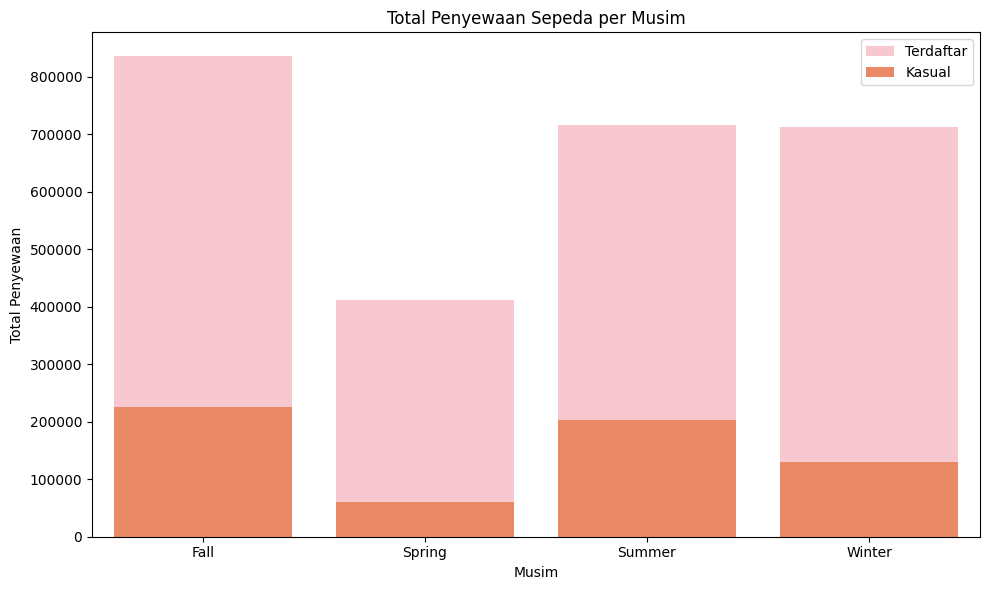

In [87]:
# Total penyewa per musim
season_total = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=season_total,
    x='season',
    y='registered',
    label='Terdaftar',
    color='pink'
)
sns.barplot(
    data=season_total,
    x='season',
    y='casual',
    label='Kasual',
    color='coral'
)
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-88-82f822b23738>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_total = day_df.groupby('weather')[['registered', 'casual']].sum().reset_index()


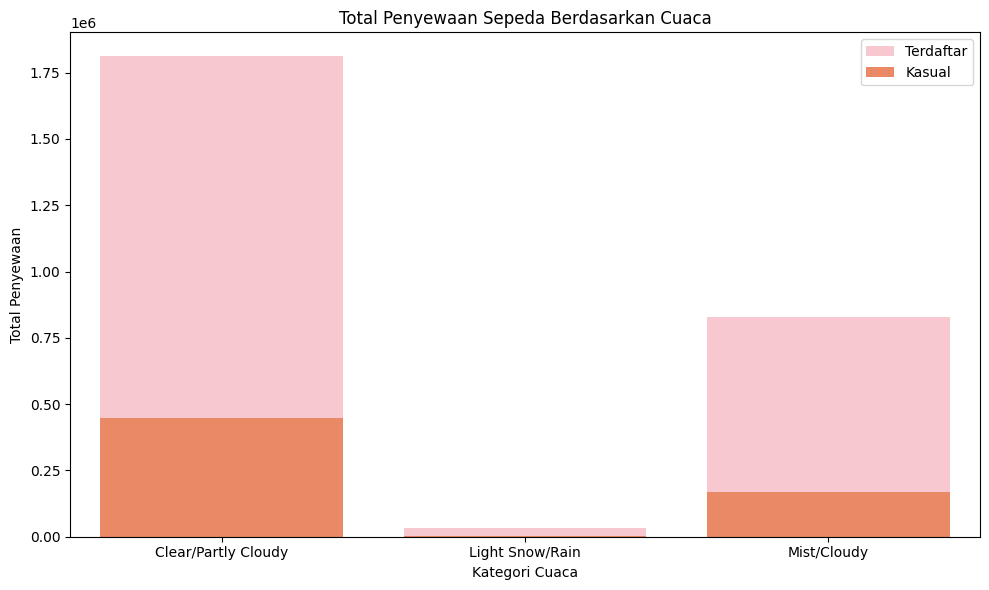

In [88]:
# Total penyewa per cuaca
weather_total = day_df.groupby('weather')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=weather_total,
    x='weather',
    y='registered',
    label='Terdaftar',
    color='pink'
)
sns.barplot(
    data=weather_total,
    x='weather',
    y='casual',
    label='Kasual',
    color='coral'
)
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Total Penyewaan')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-89-fdd0113669d3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_totals = day_df.groupby('workingday')[['registered', 'casual']].sum().reset_index()


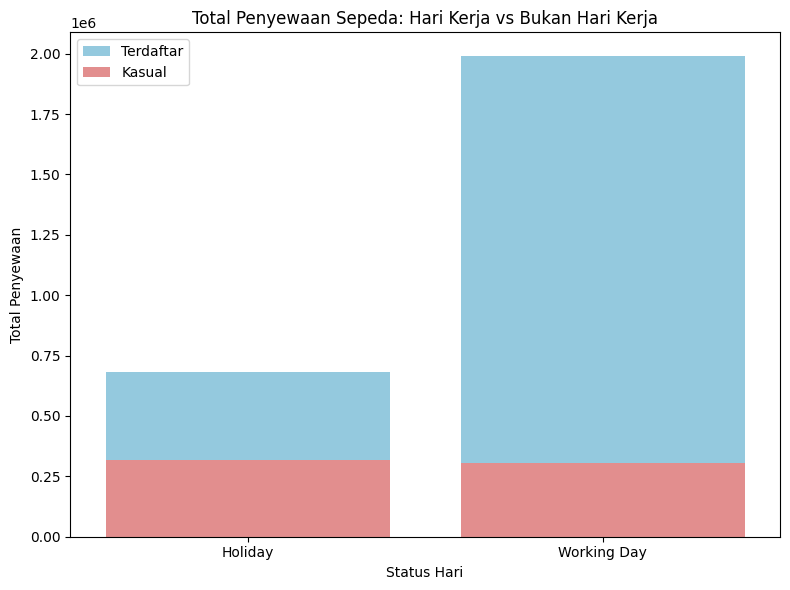

In [89]:
workingday_totals = day_df.groupby('workingday')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    data=workingday_totals,
    x='workingday',
    y='registered',
    label='Terdaftar',
    color='skyblue'
)
sns.barplot(
    data=workingday_totals,
    x='workingday',
    y='casual',
    label='Kasual',
    color='lightcoral'
)
plt.title('Total Penyewaan Sepeda: Hari Kerja vs Bukan Hari Kerja')
plt.xlabel('Status Hari')
plt.ylabel('Total Penyewaan')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-90-3868e751bd9a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_totals = day_df.groupby('weekday')[['registered', 'casual']].sum().reset_index()


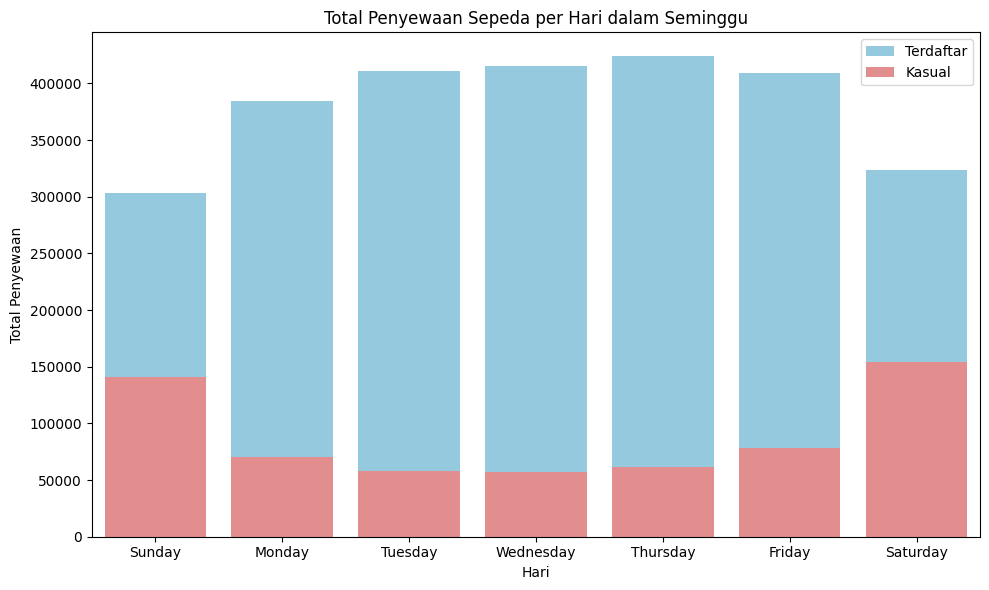

In [90]:
weekday_totals = day_df.groupby('weekday')[['registered', 'casual']].sum().reset_index()
# Urutkan hari
urutan_hari = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_totals['weekday'] = pd.Categorical(weekday_totals['weekday'], categories=urutan_hari, ordered=True)
weekday_totals = weekday_totals.sort_values('weekday')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=weekday_totals,
    x='weekday',
    y='registered',
    label='Terdaftar',
    color='skyblue'
)
sns.barplot(
    data=weekday_totals,
    x='weekday',
    y='casual',
    label='Kasual',
    color='lightcoral'
)
plt.title('Total Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-91-02044fa31361>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_totals = day_df.groupby('weather')[['registered', 'casual']].sum().reset_index()


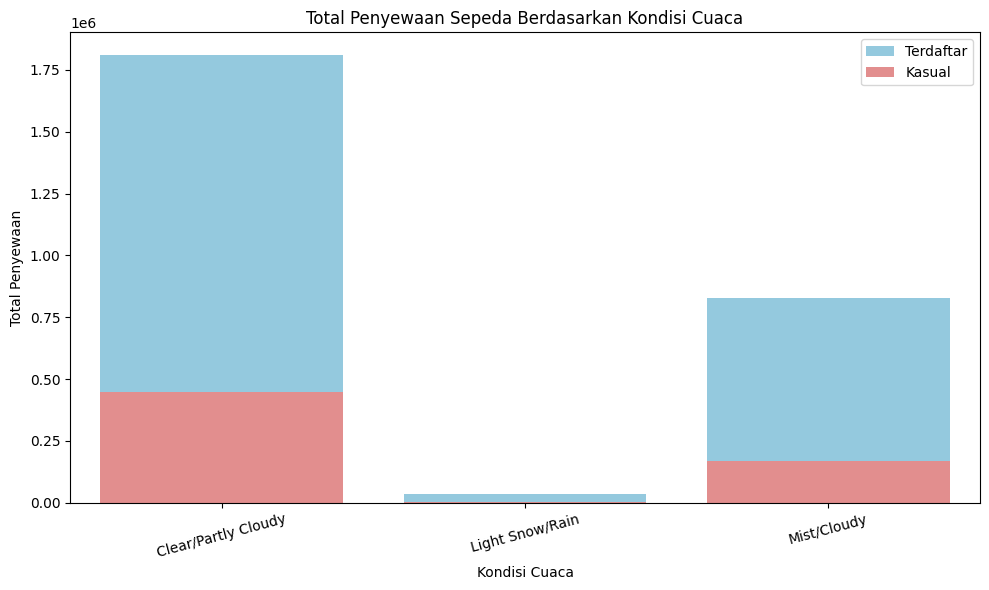

In [91]:
# Hitung total penyewaan berdasarkan weather
weather_totals = day_df.groupby('weather')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=weather_totals,
    x='weather',
    y='registered',
    label='Terdaftar',
    color='skyblue'
)
sns.barplot(
    data=weather_totals,
    x='weather',
    y='casual',
    label='Kasual',
    color='lightcoral'
)
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=15)
plt.legend()
plt.tight_layout()
plt.show()


### Pertanyaan 1:

## Analisis Lanjutan (Opsional)

In [92]:
rfm_df = hour_df.groupby(by="hour", as_index=False).agg({
    "date": "max",
    "instant": "nunique",
    "cnt": "sum"
})

rfm_df.columns = ["hour", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = hour_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,hour,frequency,monetary,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


<ipython-input-93-6e8fb139f95f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-93-6e8fb139f95f>:7: UserWarning: 
The palette list has fewer values (5) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
<ipython-input-93-6e8fb139f95f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-93-6e8fb139f95f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


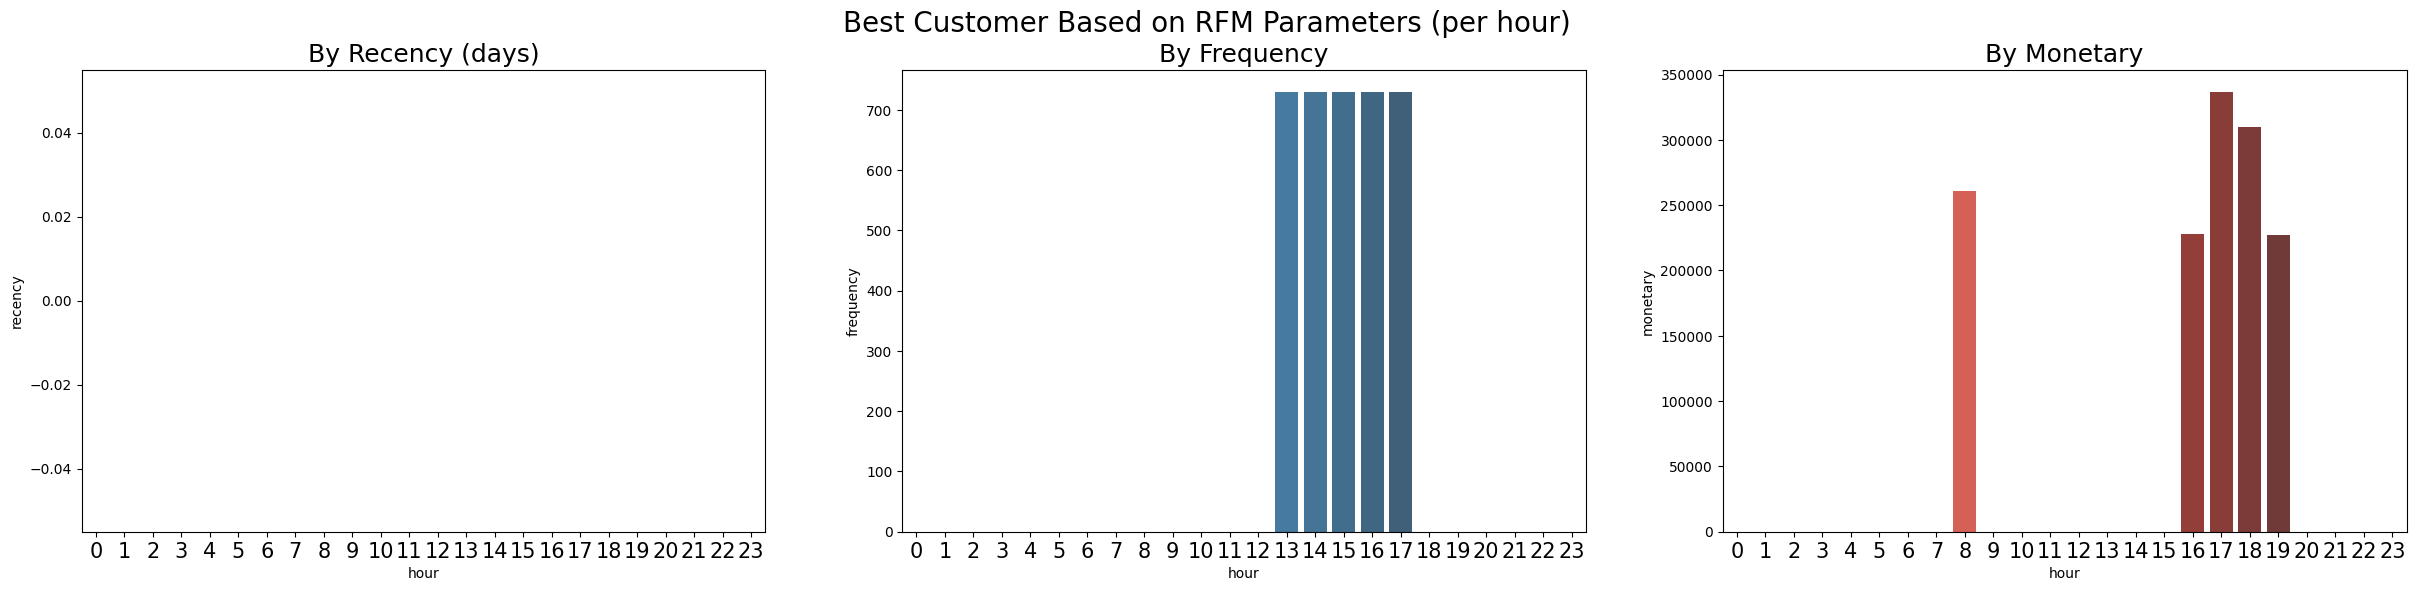

In [93]:
hour_order = list(np.arange(24))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4"] * 5

# Recency
sns.barplot(
    y="recency", x="hour",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors, ax=ax[0], order=hour_order
)
ax[0].set_ylabel("recency")
ax[0].set_xlabel("hour")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Frequency
sns.barplot(
    y="frequency", x="hour",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette='Blues_d', ax=ax[1], order=hour_order
)
ax[1].set_ylabel("frequency")
ax[1].set_xlabel("hour")
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary
sns.barplot(
    y="monetary", x="hour",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette='Reds_d', ax=ax[2], order=hour_order
)
ax[2].set_ylabel("monetary")
ax[2].set_xlabel("hour")
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (per hour)", fontsize=20)
plt.show()


**Insight:**

Melalui analisis RFM (Recency, Frequency, Monetary) ini, kita dapat mengidentifikasi jam-jam terbaik dalam hal penggunaan sepeda. Visualisasi ini menyajikan lima jam teratas berdasarkan tiga aspek penting:

- Recency: Menunjukkan jam-jam terbaru di mana sepeda masih aktif digunakan. Merefleksikan tren terkini atau pola kebiasaan pengguna dalam waktu dekat.
- Frequency: Mewakili jam-jam dengan frekuensi penyewaan tertinggi. Artinya, pada jam-jam tersebut, terjadi lonjakan aktivitas penyewaan sepeda, yang bisa dianggap sebagai waktu sibuk.
- Monetary: Menunjukkan jam-jam yang menghasilkan pendapatan tertinggi, baik dari pengguna terdaftar maupun tidak terdaftar.


**Penerapan RFM Analysis dalam Bisnis Penyewaan Sepeda**
1. **Strategi Operasional**
- Penjadwalan Stok Sepeda: Jam-jam dengan frekuensi tinggi bisa jadi acuan untuk menambah jumlah sepeda di lokasi tertentu, atau memastikan sepeda selalu tersedia.
- Penyesuaian Jadwal Pemeliharaan: Sepeda bisa dijadwalkan untuk dirawat di luar jam-jam sibuk, agar tidak mengganggu potensi pendapatan.

2. **Pemasaran dan Promosi**
- Waktu Promosi Terbaik: Dengan mengetahui jam dengan monetary tertinggi, bisnis bisa menempatkan iklan, promosi, atau diskon khusus di waktu tersebut untuk memaksimalkan konversi.

3. **Pengambilan Keputusan Finansial**
- Optimasi Pendapatan: Jam-jam dengan monetary value tertinggi menunjukkan waktu paling menguntungkan. Fokus layanan dan investasi bisa diarahkan ke jam-jam tersebut.
- Perencanaan Harga Dinamis: Bisa jadi dasar penerapan dynamic pricing — harga sewa lebih tinggi saat demand tinggi, dan diskon di jam sepi.

4. **Pengembangan Produk & Layanan**
- Perluasan Layanan: Jika terdapat pola jam sibuk tertentu yang konsisten, bisa jadi sinyal bahwa permintaan tinggi di waktu itu—bisnis bisa menambahkan fitur baru, seperti layanan premium, sepeda listrik, atau pickup service.
- Rekomendasi Waktu Sewa: Aplikasi atau website penyewaan bisa menyarankan jam ideal untuk menyewa. Misalnya, saat tidak terlalu padat, berdasarkan data frequency dan recency.

## Conclusion

- Total penyewaan sepeda tertinggi terjadi pada musim gugur(fall), dengan pelanggan terdaftar melebihi pelanggan biasa, dan terendah pada musim semi, pelanggan terdaftar melebihi pelanggan biasa.

- Kondisi cuaca yang cerah adalah yang paling menguntungkan untuk penyewaan sepeda, sementara kondisi salju/hujan ringan menghasilkan rata-rata penyewaan terendah, yang menunjukan dampak signifikan dari cuaca terhadap perilaku penyewaan sepeda.

- Penyewaan sepeda banyak terjadi pada hari kerja dan didominasi oleh pengguna terdaftar

- Penyewaan sepeda lebih tinggi pada hari kamis untuk pengguna terdaftar, sementara pengguna kasual biasanya lebih ramai pada hari libur, misalnya hari sabtu dan minggu.




In [94]:
hour_df.to_csv("main_data.csv", index=False)